# BFS
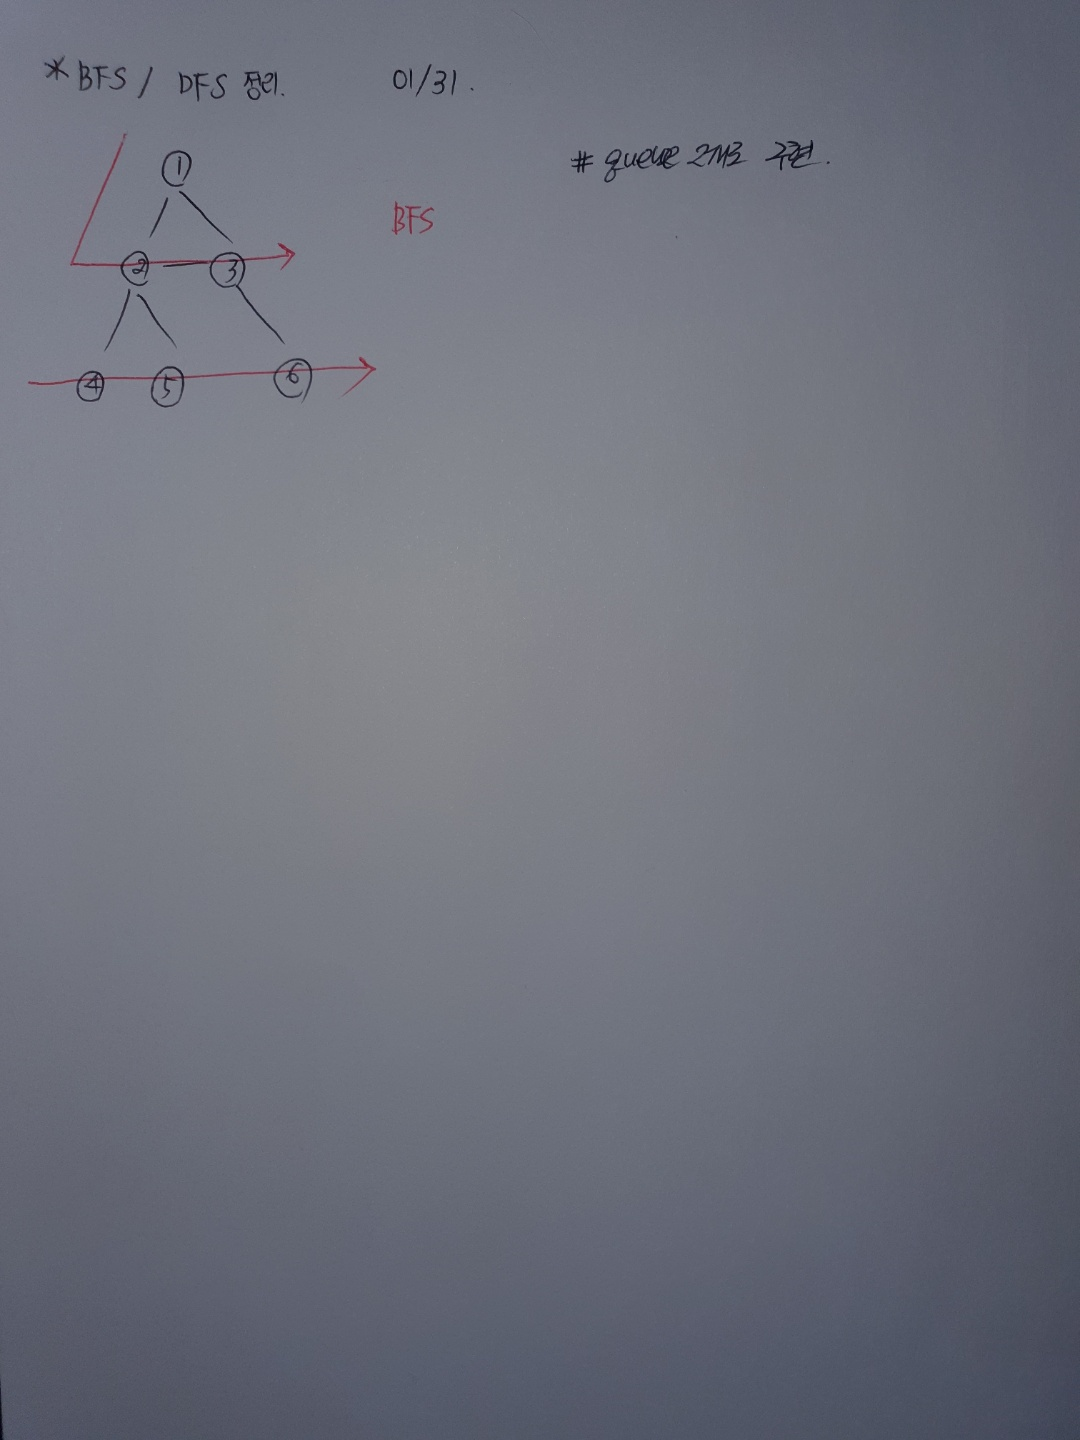

In [17]:
graph ={1:[2,3],2:[1,3,4,5],3:[1,6],4:[2],5:[2],6:[3]}

In [15]:
# 처음 내가 배운 버전
def bfs(start, graph):
    visited = []
    next_visit = [start] # queue 
    while next_visit:
        print('visited',visited)
        print('next visited',next_visit)
        next = next_visit.pop(0)
        if next not in visited:
            visited.append(next)
            next_visit.extend(graph[next])
    return visited
    

In [18]:
bfs(1,graph)

visited []
next visited [1]
visited [1]
next visited [2, 3]
visited [1, 2]
next visited [3, 1, 3, 4, 5]
visited [1, 2, 3]
next visited [1, 3, 4, 5, 1, 6]
visited [1, 2, 3]
next visited [3, 4, 5, 1, 6]
visited [1, 2, 3]
next visited [4, 5, 1, 6]
visited [1, 2, 3, 4]
next visited [5, 1, 6, 2]
visited [1, 2, 3, 4, 5]
next visited [1, 6, 2, 2]
visited [1, 2, 3, 4, 5]
next visited [6, 2, 2]
visited [1, 2, 3, 4, 5, 6]
next visited [2, 2, 3]
visited [1, 2, 3, 4, 5, 6]
next visited [2, 3]
visited [1, 2, 3, 4, 5, 6]
next visited [3]


[1, 2, 3, 4, 5, 6]

# 응용 1. 조합
## 풀이 1 : itertools에서 combination 불러와서 하기
## 풀이 2 : dfs로 접근하기

In [30]:
lst = [1,2,3,4,5,6,7,9,10]
m = 2
def bfs_comb(lst, m):
    n = len(lst)
    result = []
    visited = []
    next_visited = [[i] for i in range(n-m+1)] # 시작점 : n-m+1개, 차이점 : 기존과는 다르게 list 형태로
    while next_visited:
        next = next_visited.pop()
        if len(next)!=m: # 원하는 조건이 아니라면
            for i in range(next[-1]+1,n):
                next_visited.append(next+[i]) # 어차피 중복이 존재하지 않을 것!
        else:
            result.append(next)
    return [[lst[j] for j in i] for i in result]
            

In [31]:
print(bfs_comb(list,m))

[[9, 10], [7, 10], [7, 9], [6, 10], [6, 9], [6, 7], [5, 10], [5, 9], [5, 7], [5, 6], [4, 10], [4, 9], [4, 7], [4, 6], [4, 5], [3, 10], [3, 9], [3, 7], [3, 6], [3, 5], [3, 4], [2, 10], [2, 9], [2, 7], [2, 6], [2, 5], [2, 4], [2, 3], [1, 10], [1, 9], [1, 7], [1, 6], [1, 5], [1, 4], [1, 3], [1, 2]]


# 응용 2. 순열

In [32]:
lst = [1,2,3,4,5,6,7,9,10]
m = 2
def dfs_comb(lst,m):
    n = len(lst)
    result = []
    visited = []
    next_visited = [[i] for i in range(n)] # 순열이기에
    while next_visited:
        next = next_visited.pop()
        if len(next)!=m: # 1,2,3,4,5,6,7,8,9,10
            for i in range(n):
                if i not in next: # 순열이니깐 -> 중복 순열일 경우는 달라질 듯
                    next_visited.append(next+[i])
        else:
            result.append(next)
    return [[lst[j] for j in i] for i in result]

In [34]:
print(dfs_comb(lst,m))

[[10, 9], [10, 7], [10, 6], [10, 5], [10, 4], [10, 3], [10, 2], [10, 1], [9, 10], [9, 7], [9, 6], [9, 5], [9, 4], [9, 3], [9, 2], [9, 1], [7, 10], [7, 9], [7, 6], [7, 5], [7, 4], [7, 3], [7, 2], [7, 1], [6, 10], [6, 9], [6, 7], [6, 5], [6, 4], [6, 3], [6, 2], [6, 1], [5, 10], [5, 9], [5, 7], [5, 6], [5, 4], [5, 3], [5, 2], [5, 1], [4, 10], [4, 9], [4, 7], [4, 6], [4, 5], [4, 3], [4, 2], [4, 1], [3, 10], [3, 9], [3, 7], [3, 6], [3, 5], [3, 4], [3, 2], [3, 1], [2, 10], [2, 9], [2, 7], [2, 6], [2, 5], [2, 4], [2, 3], [2, 1], [1, 10], [1, 9], [1, 7], [1, 6], [1, 5], [1, 4], [1, 3], [1, 2]]


# 응용 3. 최단 거리 계산
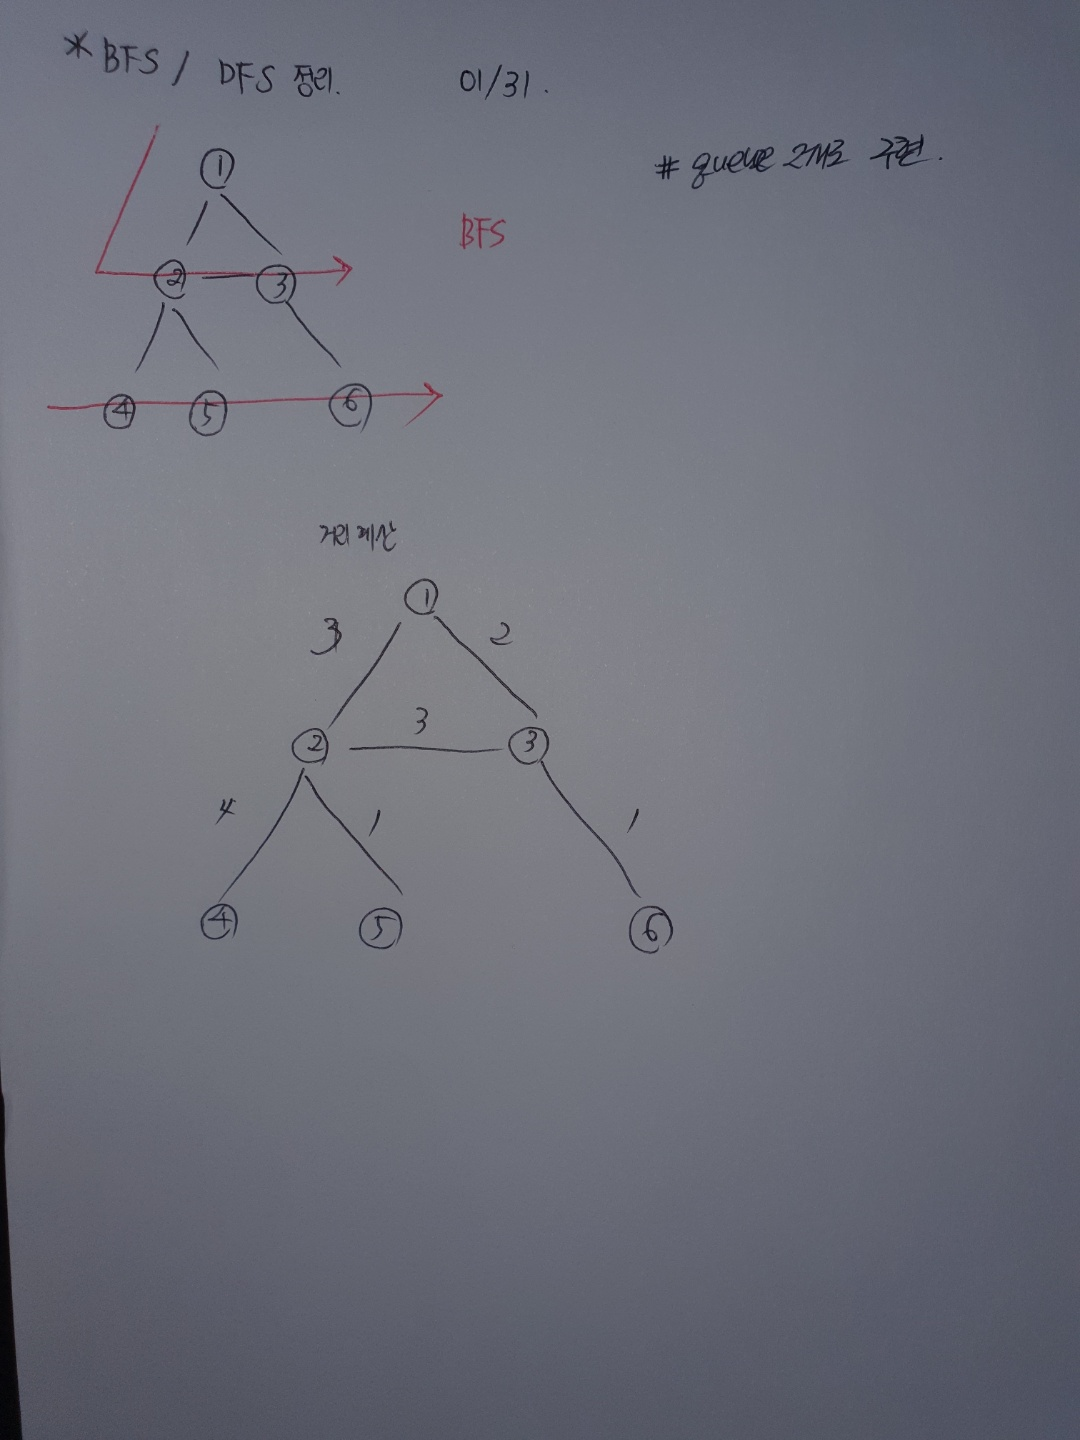

In [ ]:
# graph

In [35]:
graph={}
graph[1]=[2,3]
graph[2]=[1,3,4,5]
graph[3]=[1,2,6]
graph[4]=[2]
graph[5]=[2]
graph[6]=[3]

In [ ]:
# cost

In [48]:
cost=[[0]*len(graph) for _ in range(len(graph))]
cost[1-1][2-1]=3
cost[2-1][1-1]=3
cost[1-1][3-1]=1
cost[3-1][1-1]=1
cost[2-1][3-1]=1
cost[3-1][2-1]=1
cost[2-1][4-1]=4
cost[4-1][2-1]=4
cost[2-1][5-1]=1
cost[5-1][2-1]=1
cost[3-1][6-1]=1
cost[6-1][3-1]=1

In [50]:
# bfs로 풀던, dfs로 풀던 큰 문제 없음
# 최단 경로 
def bfs_short(graph,cost,start):
    visited=[]
    next_visited=[start] # queue
    length = {start:-1}
    while next_visited:
        print(next_visited)
        next = next_visited.pop(0)
        if next not in visited:
            visited.append(next)
            for i in graph[next]:
                if length.get(i):
                    length[i]=min(length[i],cost[next-1][i-1]+length[next])
                else:
                    length[i]=cost[next-1][i-1]+length[next]
                next_visited.append(i)
    return length

In [51]:
bfs_short(graph,cost,1)

[1]
[2, 3]
[3, 1, 3, 4, 5]
[1, 3, 4, 5, 1, 2, 6]
[3, 4, 5, 1, 2, 6]
[4, 5, 1, 2, 6]
[5, 1, 2, 6, 2]
[1, 2, 6, 2, 2]
[2, 6, 2, 2]
[6, 2, 2]
[2, 2, 3]
[2, 3]
[3]


{1: -1, 2: 2, 3: 3, 4: 6, 5: 3, 6: 4}